# Manual PCA calculation with step by step guide with below-mentioned blog

https://medium.com/analytics-vidhya/understanding-principle-component-analysis-pca-step-by-step-e7a4bb4031d9

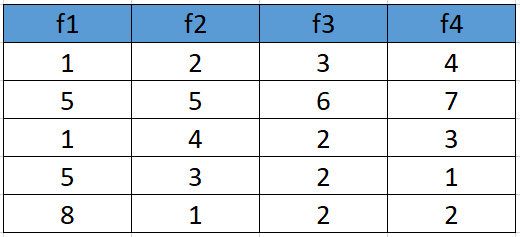

In [2]:
import numpy as np

In [3]:
# STEP 1 a
# Creating a matrix as above mentined image
test_matrix = np.array([
                        [1,2,3,4],
                        [5,5,6,7],
                        [1,4,2,3],
                        [5,3,2,1],
                        [8,1,2,2]
                                  ])
test_matrix

array([[1, 2, 3, 4],
       [5, 5, 6, 7],
       [1, 4, 2, 3],
       [5, 3, 2, 1],
       [8, 1, 2, 2]])

In [4]:
import pandas as pd

In [5]:
# STEP 1 b - alternative
# Creating a DataFrame with fetaures

test_df = pd.DataFrame([
                        [1,2,3,4],
                        [5,5,6,7],
                        [1,4,2,3],
                        [5,3,2,1],
                        [8,1,2,2]
                                  ], columns = ['f'+str(i+1) for i in range(4)])

In [6]:
# STEP 2

# Calculating mean and standard deviation of sample (with degrees of freedom = 1)

# create empty lists
means = np.array([])
stds = np.array([])
for col in range(test_matrix.shape[1]):
  print('COLUMN', str(col)+':')
  print('mean:', test_matrix[:,col].mean())
  # append mean to the list
  means = np.hstack((means, test_matrix[:,col].mean()))
  print('std:', test_matrix[:,col].std(ddof = 1))
  # append std to the list
  stds = np.hstack((stds, test_matrix[:,col].std(ddof = 1)))
  print('='*10)
  print('')

# create zero matirices with one row
means_mtrx = np.zeros(test_matrix.shape[1])
stds_mtrx = np.zeros(test_matrix.shape[1])

# add the same list of means (stds) to the corresponding matrix as many as the number of rows of original matrix
# in order to easy matrix calcualtion
for row in range(test_matrix.shape[0]):
  means_mtrx = np.vstack((means_mtrx, means))
  stds_mtrx = np.vstack((stds_mtrx, stds))

# matrix of means for all 4 features
means_mtrx = means_mtrx[1:]

# matrix of stds for all 4 features
stds_mtrx = stds_mtrx[1:]

COLUMN 0:
mean: 4.0
std: 3.0

COLUMN 1:
mean: 3.0
std: 1.5811388300841898

COLUMN 2:
mean: 3.0
std: 1.7320508075688772

COLUMN 3:
mean: 3.4
std: 2.302172886644268



In [7]:
print(means_mtrx)
print('')
print("="*50)
print('')
print(stds_mtrx)

[[4.  3.  3.  3.4]
 [4.  3.  3.  3.4]
 [4.  3.  3.  3.4]
 [4.  3.  3.  3.4]
 [4.  3.  3.  3.4]]


[[3.         1.58113883 1.73205081 2.30217289]
 [3.         1.58113883 1.73205081 2.30217289]
 [3.         1.58113883 1.73205081 2.30217289]
 [3.         1.58113883 1.73205081 2.30217289]
 [3.         1.58113883 1.73205081 2.30217289]]


In [8]:
# STEP 3
# standardize the matrix

# find elementwise difference with mean and divide by standard deviation
stndrd_mtrx = (test_matrix - means_mtrx)/stds_mtrx
stndrd_mtrx

array([[-1.        , -0.63245553,  0.        ,  0.26062335],
       [ 0.33333333,  1.26491106,  1.73205081,  1.56374007],
       [-1.        ,  0.63245553, -0.57735027, -0.1737489 ],
       [ 0.33333333,  0.        , -0.57735027, -1.04249338],
       [ 1.33333333, -1.26491106, -0.57735027, -0.60812114]])

In [9]:
# STEP 4

# Find covariances

# create a zero matrix to append elements further
covar_mtrx = np.zeros(stndrd_mtrx.shape[1])

# for all cols in standardized matrix
for col1 in range(stndrd_mtrx.shape[1]):

  # empty list for covariance of one feature with all other features (columns)
  temp_line = []

  # with all cols in standardized matrix
  for col2 in range(stndrd_mtrx.shape[1]):

    # if columns are not the same
    if col1 == col2:
      # print(col1)
      # print('var')

      # find covariance of two features (columns)
      temp_line.append(sum([(stndrd_mtrx[row,col1] - 0)**2 for row in range(stndrd_mtrx.shape[0])])/stndrd_mtrx.shape[0])
      print('('+str(col1)+', '+str(col2)+') - VAR:',
          sum([(stndrd_mtrx[row,col1] - 0)**2 for row in range(stndrd_mtrx.shape[0])])/stndrd_mtrx.shape[0])
    
    # if columns (features) are the same
    else:
      # print(col1, col2)
      # print('covar')

      # find variance of given feature
      temp_line.append(sum([(stndrd_mtrx[row,col1] - 0) * (stndrd_mtrx[row,col2] - 0) for row in range(stndrd_mtrx.shape[0])])/stndrd_mtrx.shape[0])
      print('('+str(col1)+', '+str(col2)+') - COVAR:',
             sum([(stndrd_mtrx[row,col1] - 0) * (stndrd_mtrx[row,col2] - 0) for row in range(stndrd_mtrx.shape[0])])/stndrd_mtrx.shape[0])
  
  # add list of covariances of one column with other columns to the matrix
  # in order to get cross (joint) matrix
  covar_mtrx = np.vstack((covar_mtrx, np.array(temp_line)))
  print("="*50)
covar_mtrx = covar_mtrx[1:]
print('')
print("="*50)
print('')
print('COVARIANCE TABLE')
pd.DataFrame(covar_mtrx, index = ['f'+str(i+1) for i in range(4)], columns = ['f'+str(i+1) for i in range(4)])

(0, 0) - VAR: 0.8
(0, 1) - COVAR: -0.25298221281347033
(0, 2) - COVAR: 0.03849001794597502
(0, 3) - COVAR: -0.14479074758768978
(1, 0) - COVAR: -0.25298221281347033
(1, 1) - VAR: 0.8
(1, 2) - COVAR: 0.5112077203381551
(1, 3) - COVAR: 0.4944980302152803
(2, 0) - COVAR: 0.03849001794597502
(2, 1) - COVAR: 0.5112077203381551
(2, 2) - VAR: 0.8000000000000002
(2, 3) - COVAR: 0.7523547938632786
(3, 0) - COVAR: -0.14479074758768978
(3, 1) - COVAR: 0.4944980302152803
(3, 2) - COVAR: 0.7523547938632786
(3, 3) - VAR: 0.7999999999999997


COVARIANCE TABLE


,f1,f2,f3,f4
f1,0.800000,-0.252982,0.038490,-0.144791
f2,-0.252982,0.800000,0.511208,0.494498
f3,0.038490,0.511208,0.800000,0.752355
f4,-0.144791,0.494498,0.752355,0.800000


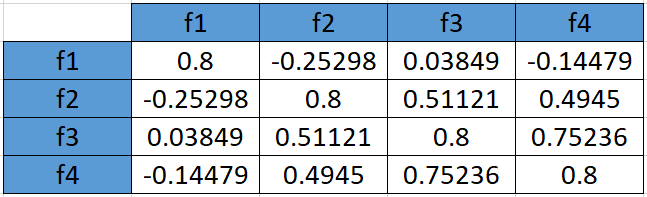

In [10]:
import numpy.linalg as nplin

In [11]:
# STEP 5

# Calculate Eigenvalues and eigenvectors
values, vectors = nplin.eig(covar_mtrx)

In [12]:
print(values)
print('')
print("="*50)
print('')
print(vectors)

[2.01263459 0.8522308  0.31510964 0.02002497]


[[ 0.16195986 -0.91705888 -0.30707099  0.19616173]
 [-0.52404813  0.20692161 -0.81731886  0.12061043]
 [-0.58589647 -0.3205394   0.1882497  -0.72009851]
 [-0.59654663 -0.11593512  0.44973251  0.65454704]]


In [13]:
top2_vec = vectors[:,:2]
top2_vec

array([[ 0.16195986, -0.91705888],
       [-0.52404813,  0.20692161],
       [-0.58589647, -0.3205394 ],
       [-0.59654663, -0.11593512]])

In [14]:
# STEP 6

# Finding top 2 eigenvectors (vectors corresponding to top 2 eigenvalues)

# convert aray to list
lvalues = list(values)

# find max value
v1 = max(lvalues)
# find index of max value
index_v1 = lvalues.index(v1)
# remove max value
lvalues.remove(max(lvalues))
# find second max value
v2 = max(lvalues)
# restore the list (back to original)
lvalues = list(values)
# find index of second max value in original list
index_v2 = lvalues.index(v2)

print('1st maxt eigenvalue:', v1)
print('index:', index_v1)
print('='*50)
print('2nd maxt eigenvalue:', v2)
print('index:', index_v2)
print('='*50)

# find the vectors at the same indices with the max eigenvalues
top2_vec = vectors[:,(index_v1,index_v2)]
print('   Vector 1\t', 'Vector 2')
print('-'*50)
print(top2_vec)

1st maxt eigenvalue: 2.012634592647956
index: 0
2nd maxt eigenvalue: 0.8522308028065152
index: 1
   Vector 1	 Vector 2
--------------------------------------------------
[[ 0.16195986 -0.91705888]
 [-0.52404813  0.20692161]
 [-0.58589647 -0.3205394 ]
 [-0.59654663 -0.11593512]]


In [15]:
import pandas as pd

In [16]:
# STEP 7
# FINAL
# Calculate the PCAs

# Multiply (dot product) the standardized matrix with top 2 eigenvectors
# (the column size of first is always equal to row size of second)
pd.DataFrame(stndrd_mtrx @ top2_vec)

,0,1
0,0.014003,0.755975
1,-2.556534,-0.780432
2,-0.051480,1.253135
3,1.014150,0.000239
4,1.579861,-1.228917


In [17]:
def find_pca(matrix):

  # STEP 1
  # in case it is a dataframe convert it to matrix
  try:
        matrix = np.array(matrix)
  except:
        print('import numpy as np')

  # STEP 2
  # find mean and standard deviation of each feature
  means = np.array([])
  stds = np.array([])
  for col in range(matrix.shape[1]):
    means = np.hstack((means, matrix[:,col].mean()))
    stds = np.hstack((stds, matrix[:,col].std(ddof = 1)))

  means_mtrx = np.zeros(matrix.shape[1])
  stds_mtrx = np.zeros(matrix.shape[1])
  for row in range(matrix.shape[0]):
    means_mtrx = np.vstack((means_mtrx, means))
    stds_mtrx = np.vstack((stds_mtrx, stds))

  means_mtrx = means_mtrx[1:]
  stds_mtrx = stds_mtrx[1:]

  # STEP 3
  # standardize the values of each feature
  stndrd_mtrx = (matrix - means_mtrx)/stds_mtrx
  
  # STEP 4
  # find covariance for each feature combinations (between all features)
  covar_mtrx = np.zeros(stndrd_mtrx.shape[1])
  for col1 in range(stndrd_mtrx.shape[1]):
    temp_line = []
    for col2 in range(stndrd_mtrx.shape[1]):
      if col1 == col2:
        temp_line.append(sum([(stndrd_mtrx[row,col1] - 0)**2
                              for row in range(stndrd_mtrx.shape[0])]
                              )/stndrd_mtrx.shape[0])
      else:
        temp_line.append(sum([(stndrd_mtrx[row,col1] - 0) * (stndrd_mtrx[row,col2] - 0) 
                              for row in range(stndrd_mtrx.shape[0])]
                              )/stndrd_mtrx.shape[0])
        
    covar_mtrx = np.vstack((covar_mtrx, np.array(temp_line)))

  covar_mtrx = covar_mtrx[1:]

  # STEP 5
  # find eigenvalues and vectors
  try:
        values, vectors = nplin.eig(covar_mtrx)
  except:
        print('import numpy.linalg as nplin')

  # STEP 6
  # take top 2 vectors sorted by top 2 e
  # find the indices of 1st and 2nd largest value
  lvalues = list(values)
  v1 = max(lvalues)
  index_v1 = lvalues.index(v1)
  lvalues.remove(max(lvalues))
  v2 = max(lvalues)
  lvalues = list(values)
  index_v2 = lvalues.index(v2)

  # chose the vectors at the same indices with top 2 largest values
  top2_vec = vectors[:,(index_v1,index_v2)]

  # STEP 7 - FINAL
  pca = stndrd_mtrx @ top2_vec
  return pca

In [18]:
find_pca(test_matrix)

array([[ 1.40033078e-02,  7.55974765e-01],
       [-2.55653399e+00, -7.80431775e-01],
       [-5.14801919e-02,  1.25313470e+00],
       [ 1.01415002e+00,  2.38808310e-04],
       [ 1.57986086e+00, -1.22891650e+00]])

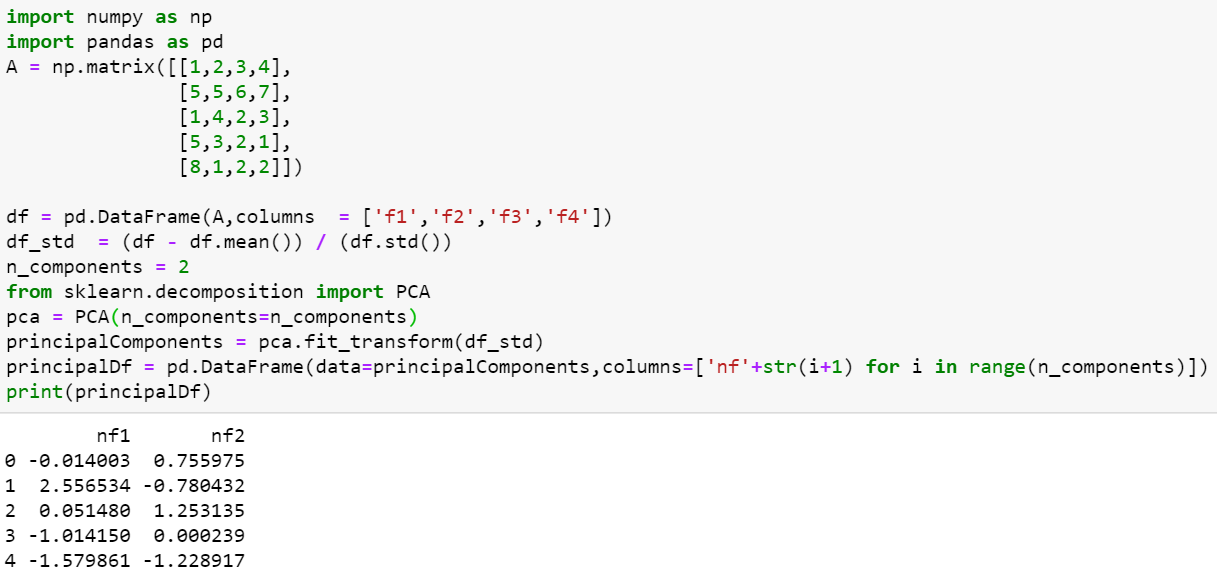

In [19]:
# Try with PCA package
from sklearn.decomposition import PCA

# Standardize the features
df_std = (pd.DataFrame(test_matrix) - pd.DataFrame(test_matrix).mean()) / pd.DataFrame(test_matrix).std()

# Choose the number of components 
n_components = 2 # number of top eigenvectors (usually take it 2, rarely 3)
pca = PCA(n_components = 2) 

# fit and transform on train data (the only transform on test data)
principalComponents = pca.fit_transform(df_std) 

# Convert result (matrix) to DataFrame
principalDf = pd.DataFrame(data=principalComponents, columns = ['nf'+str(i+1) for i in range(n_components)])
print(principalDf)

        nf1       nf2
0 -0.014003  0.755975
1  2.556534 -0.780432
2  0.051480  1.253135
3 -1.014150  0.000239
4 -1.579861 -1.228917


In [20]:
pd.DataFrame(principalComponents)

,0,1
0,-0.014003,0.755975
1,2.556534,-0.780432
2,0.051480,1.253135
3,-1.014150,0.000239
4,-1.579861,-1.228917


In [21]:
pd.DataFrame(find_pca(test_matrix))

,0,1
0,0.014003,0.755975
1,-2.556534,-0.780432
2,-0.051480,1.253135
3,1.014150,0.000239
4,1.579861,-1.228917


# Stepwise PCA Calculation Function

**Standardization function**

In [22]:
def standardize(matrix):
    # STEP 2
    # find mean and standard deviation of each feature
    means = np.array([])
    stds = np.array([])
    for col in range(matrix.shape[1]):
        means = np.hstack((means, matrix[:,col].mean()))
        stds = np.hstack((stds, matrix[:,col].std(ddof = 1)))

    means_mtrx = np.zeros(matrix.shape[1])
    stds_mtrx = np.zeros(matrix.shape[1])
    
    for row in range(matrix.shape[0]):
        means_mtrx = np.vstack((means_mtrx, means))
        stds_mtrx = np.vstack((stds_mtrx, stds))

    means_mtrx = means_mtrx[1:]
    stds_mtrx = stds_mtrx[1:]

    # STEP 3
    # standardize the values of each feature
    stndrd_mtrx = (matrix - means_mtrx)/stds_mtrx
    return stndrd_mtrx

**Covariance function**

In [23]:
# STEP 4
# find covariance for each feature combinations (between all features)
def covariance(matrix):
    covar_mtrx = np.zeros(matrix.shape[1])
    for col1 in range(matrix.shape[1]):
        temp_line = []
        for col2 in range(matrix.shape[1]):
            if col1 == col2:
                temp_line.append(sum([(matrix[row,col1] - 0)**2
                                  for row in range(matrix.shape[0])]
                                  )/matrix.shape[0])
            else:
                temp_line.append(sum([(matrix[row,col1] - 0) * (matrix[row,col2] - 0) 
                                  for row in range(matrix.shape[0])]
                                  )/matrix.shape[0])

        covar_mtrx = np.vstack((covar_mtrx, np.array(temp_line)))

    covar_mtrx = covar_mtrx[1:]
    return covar_mtrx

**PCA function**

In [24]:
def find_pca_alt(matrix):
    # STEP 1
    # in case it is a dataframe convert it to matrix
    try:
        matrix = np.array(matrix)
    except:
        print('import numpy as np')

    # STEP 2
    # find mean and standard deviation of each feature
    # ... go to step 3

    # STEP 3
    # standardize the values of each feature
    stndrd_mtrx = standardize(matrix)
  
    # STEP 4
    # find covariance for each feature combinations (between all features)
    covar_mtrx = covariance(stndrd_mtrx)

    # STEP 5
    # find eigenvalues and vectors
    try:
        values, vectors = nplin.eig(covar_mtrx)
    except:
        print('import numpy.linalg as nplin')

    # STEP 6
    # take top 2 vectors sorted by top 2 e
    # find the indices of 1st and 2nd largest value
    lvalues = list(values)
    v1 = max(lvalues)
    index_v1 = lvalues.index(v1)
    lvalues.remove(max(lvalues))
    v2 = max(lvalues)
    lvalues = list(values)
    index_v2 = lvalues.index(v2)

    # chose the vectors at the same indices with top 2 largest values
    top2_vec = vectors[:,(index_v1,index_v2)]

    # STEP 7 - FINAL
    pca = stndrd_mtrx @ top2_vec
    return pca

In [25]:
pd.DataFrame(principalComponents)

,0,1
0,-0.014003,0.755975
1,2.556534,-0.780432
2,0.051480,1.253135
3,-1.014150,0.000239
4,-1.579861,-1.228917


In [26]:
pd.DataFrame(find_pca_alt(test_df))

,0,1
0,0.014003,0.755975
1,-2.556534,-0.780432
2,-0.051480,1.253135
3,1.014150,0.000239
4,1.579861,-1.228917


In [27]:
pd.DataFrame(find_pca(test_df))

,0,1
0,0.014003,0.755975
1,-2.556534,-0.780432
2,-0.051480,1.253135
3,1.014150,0.000239
4,1.579861,-1.228917


In [28]:
pd.DataFrame(stndrd_mtrx @ top2_vec)

,0,1
0,0.014003,0.755975
1,-2.556534,-0.780432
2,-0.051480,1.253135
3,1.014150,0.000239
4,1.579861,-1.228917


In [29]:
pd.DataFrame(stndrd_mtrx @ top2_vec)

,0,1
0,0.014003,0.755975
1,-2.556534,-0.780432
2,-0.051480,1.253135
3,1.014150,0.000239
4,1.579861,-1.228917
